In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')

In [3]:
car=pd.read_csv('Data/quikr_car.csv')

In [4]:
car.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [5]:
car.shape

(892, 6)

In [6]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


##### Creating backup copy

In [7]:
backup=car.copy()

## Quality

- names are pretty inconsistent
- names have company names attached to it
- some names are spam like 'Maruti Ertiga showroom condition with' and 'Well mentained Tata Sumo'
- company: many of the names are not of any company like 'Used', 'URJENT', and so on.
- year has many non-year values
- year is in object. Change to integer
- Price has Ask for Price
- Price has commas in its prices and is in object
- kms_driven has object values with kms at last.
- It has nan values and two rows have 'Petrol' in them
- fuel_type has nan values

## Cleaning Data 

#### year has many non-year values

In [8]:
car=car[car['year'].str.isnumeric()]

#### year is in object. Change to integer

In [9]:
car['year']=car['year'].astype(int)

#### Price has Ask for Price

In [10]:
car=car[car['Price']!='Ask For Price']

#### Price has commas in its prices and is in object

In [11]:
car['Price']=car['Price'].str.replace(',','').astype(int)

####  kms_driven has object values with kms at last.

In [12]:
car['kms_driven']=car['kms_driven'].str.split().str.get(0).str.replace(',','')

#### It has nan values and two rows have 'Petrol' in them

In [13]:
car=car[car['kms_driven'].str.isnumeric()]

In [14]:
car['kms_driven']=car['kms_driven'].astype(int)

#### fuel_type has nan values

In [15]:
car=car[~car['fuel_type'].isna()]

In [16]:
car.shape

(816, 6)

### name and company had spammed data...but with the previous cleaning, those rows got removed.

#### Changing car names. Keeping only the first three words

In [17]:
car['name']=car['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

In [18]:
car.duplicated().sum()

96

In [19]:
car.drop_duplicates(inplace=True)

#### Resetting the index of the final cleaned data

In [20]:
car=car.reset_index(drop=True)

## Cleaned Data

In [131]:
car.rename(columns={'Price': 'price'}, inplace=True)

C:\Users\sumit\AppData\Local\Temp\ipykernel_10788\3338762062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car.rename(columns={'Price': 'price'}, inplace=True)


In [132]:
car

,name,company,year,price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
715,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
716,Tata Indica V2,Tata,2009,110000,30000,Diesel
717,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
718,Tata Zest XM,Tata,2018,260000,27000,Diesel


In [133]:
car.to_csv('cleaned_car_data.csv')

In [23]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        720 non-null    object
 1   company     720 non-null    object
 2   year        720 non-null    int32 
 3   Price       720 non-null    int32 
 4   kms_driven  720 non-null    int32 
 5   fuel_type   720 non-null    object
dtypes: int32(3), object(3)
memory usage: 25.4+ KB


In [24]:
car.describe(include='all')

,name,company,year,Price,kms_driven,fuel_type
count,720,720,720.000000,7.200000e+02,720.000000,720
unique,254,25,NaN,NaN,NaN,3
top,Maruti Suzuki Swift,Maruti,NaN,NaN,NaN,Petrol
freq,44,199,NaN,NaN,NaN,388
mean,NaN,NaN,2012.325000,4.021574e+05,46787.397222,NaN
std,NaN,NaN,4.132363,4.781514e+05,34609.808464,NaN
min,NaN,NaN,1995.000000,3.000000e+04,0.000000,NaN
25%,NaN,NaN,2010.000000,1.672500e+05,27000.000000,NaN
50%,NaN,NaN,2013.000000,2.900000e+05,42000.000000,NaN
75%,NaN,NaN,2015.000000,4.899990e+05,59000.000000,NaN


In [25]:
car=car[car['Price']<6000000]

### Checking relationship of Company with Price

In [26]:
car['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

In [27]:
import seaborn as sns

In [87]:
car.corr(numeric_only=True)

,year,Price,kms_driven
year,1.000000,0.366570,-0.249689
Price,0.366570,1.000000,-0.152886
kms_driven,-0.249689,-0.152886,1.000000


C:\Users\sumit\AppData\Local\Temp\ipykernel_10788\2788130517.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


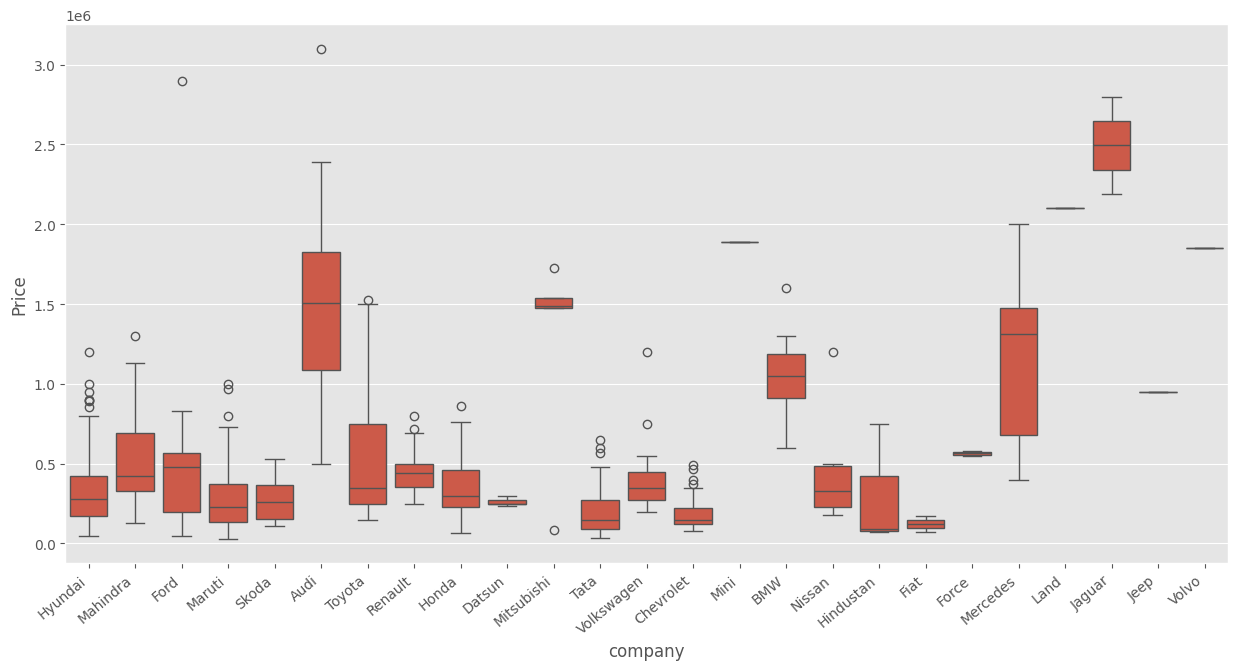

In [28]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

### Checking relationship of Year with Price

C:\Users\sumit\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sumit\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sumit\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 6.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\sumit\AppData\Local\Temp\ipykernel_10788\2542042277.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rot

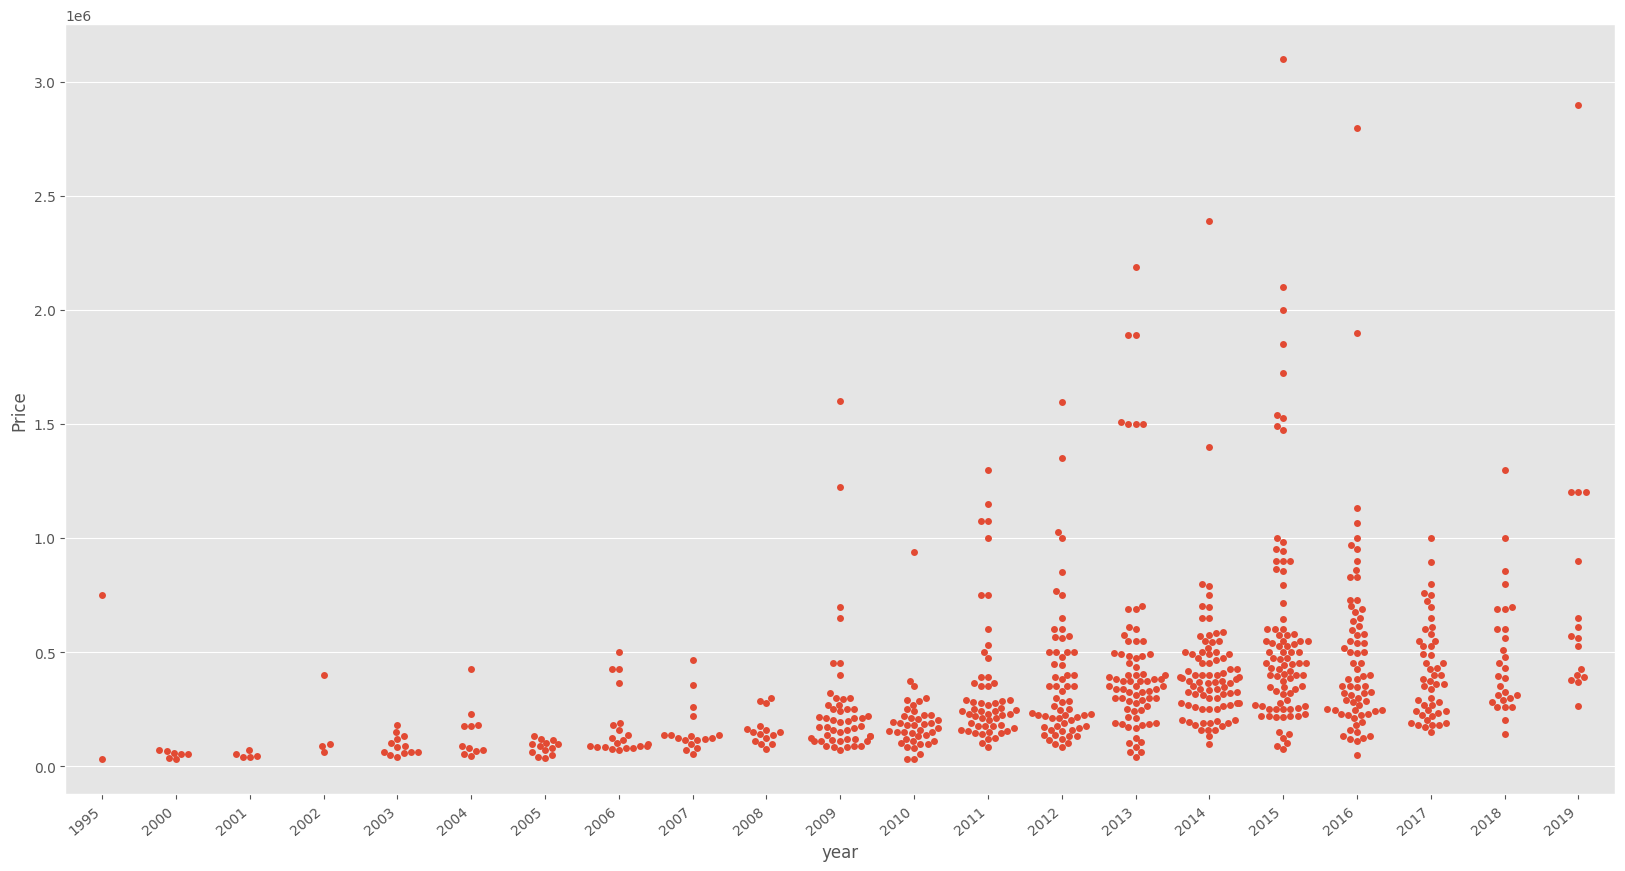

In [29]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='year',y='Price',data=car)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

### Checking relationship of kms_driven with Price

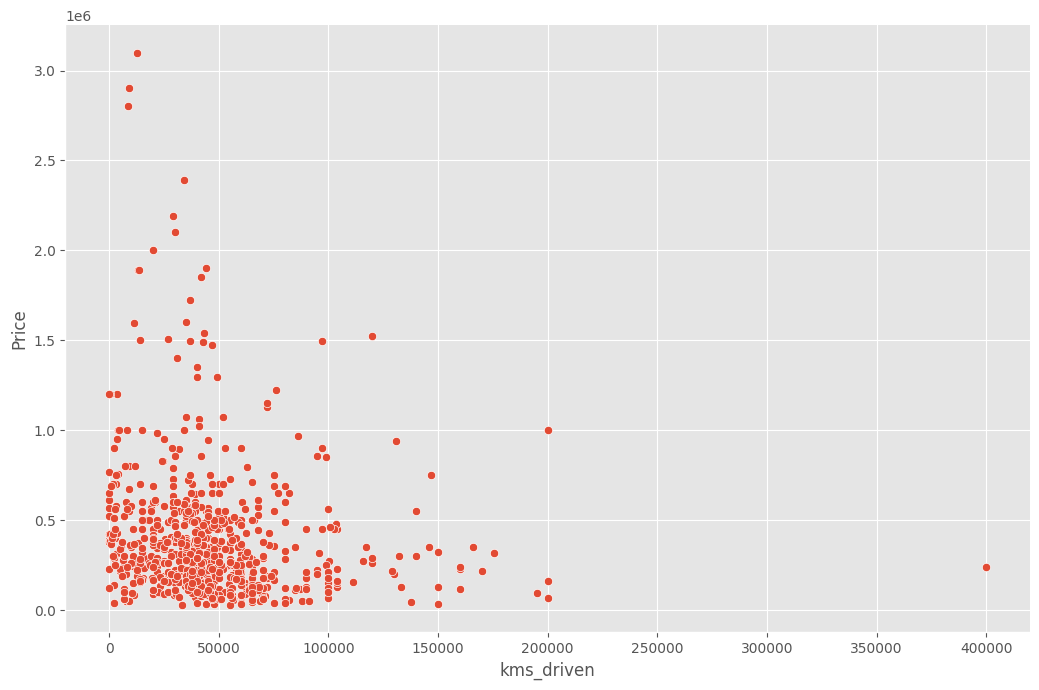

In [30]:
sns.relplot(x='kms_driven',y='Price',data=car,height=7,aspect=1.5)

### Checking relationship of Fuel Type with Price

<Axes: xlabel='fuel_type', ylabel='Price'>

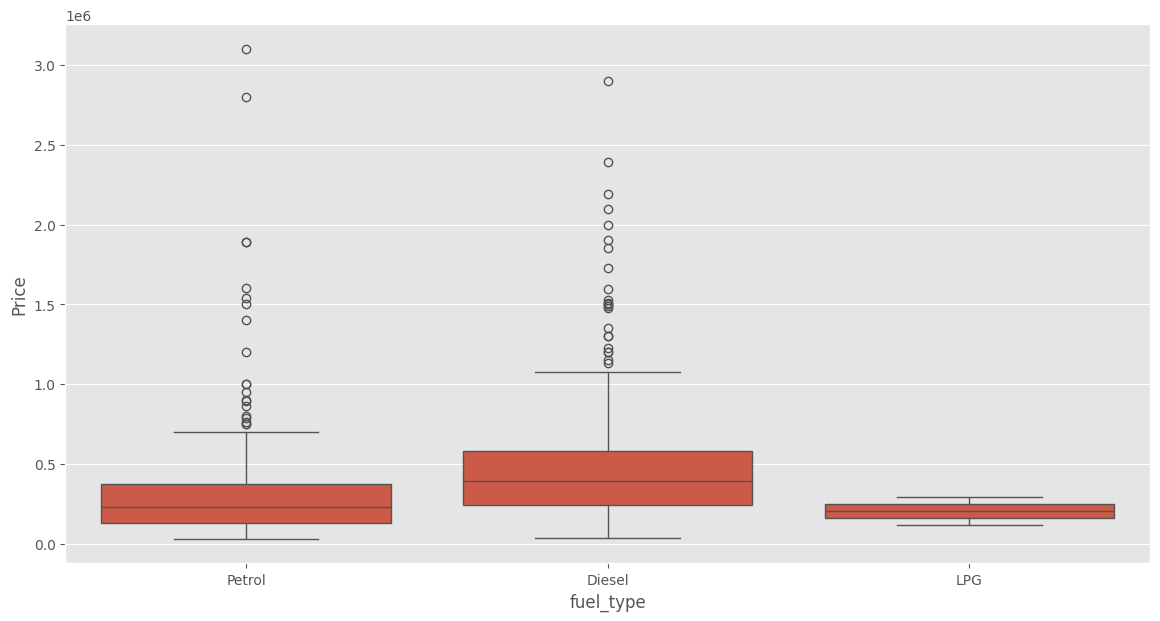

In [31]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type',y='Price',data=car)

### Relationship of Price with FuelType, Year and Company mixed

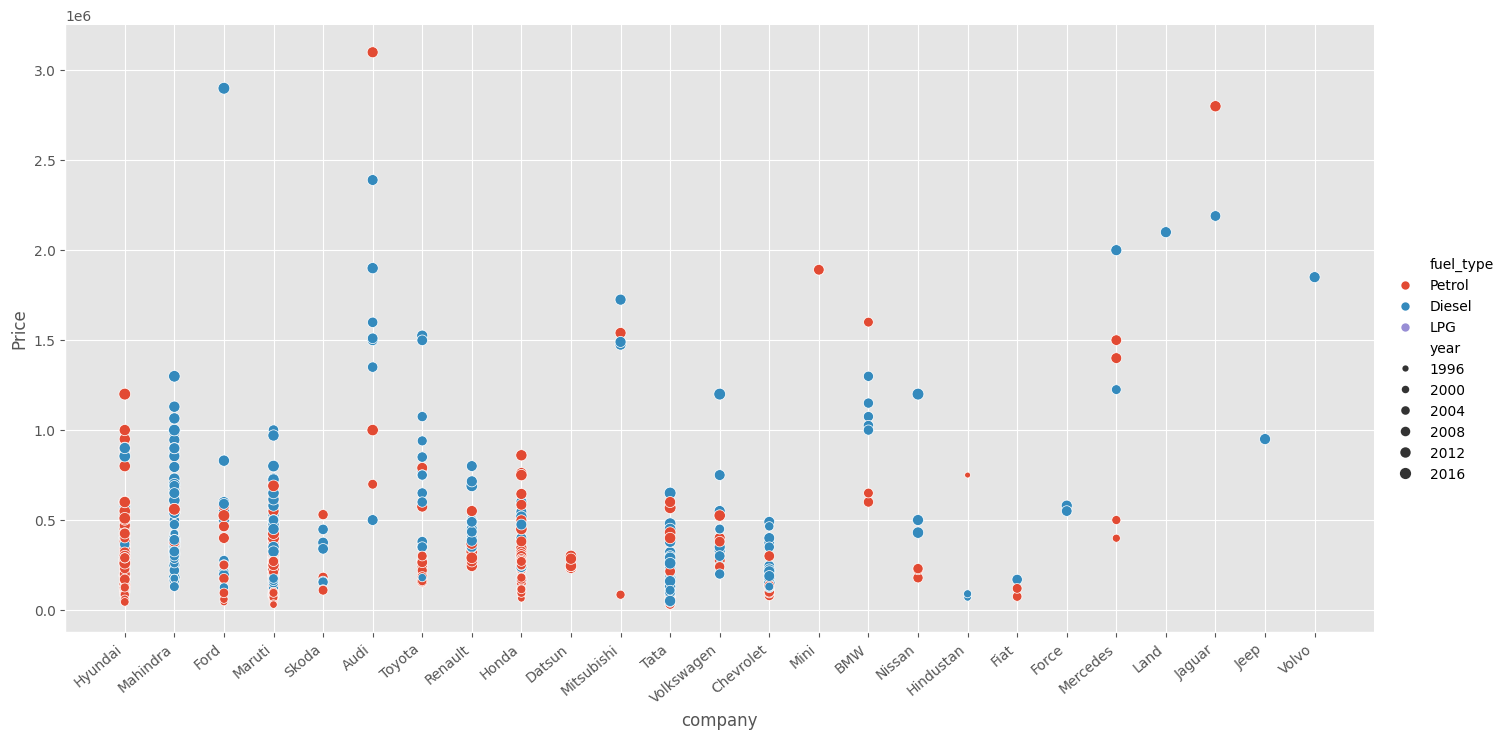

In [32]:
ax=sns.relplot(x='company',y='Price',data=car,hue='fuel_type',size='year',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

### Extracting Training Data

In [33]:
X=car[['name','company','year','kms_driven','fuel_type']]
y=car['Price']

In [34]:
X

,name,company,year,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,36000,Diesel
4,Ford Figo,Ford,2012,41000,Diesel
...,...,...,...,...,...
715,Maruti Suzuki Ritz,Maruti,2011,50000,Petrol
716,Tata Indica V2,Tata,2009,30000,Diesel
717,Toyota Corolla Altis,Toyota,2009,132000,Petrol
718,Tata Zest XM,Tata,2018,27000,Diesel


In [35]:
y.shape

(719,)

In [103]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split

#### Creating a column transformer with scaling and encoing to transform categorical columns

In [104]:
# Preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['year', 'kms_driven']),  # Apply StandardScaler to numerical columns
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['name', 'company', 'fuel_type'])  # Apply OneHotEncoder to categorical columns
    ])

#### Making a pipeline

In [105]:
# Create a pipeline that includes preprocessing and the stacking model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

In [116]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=25)

In [117]:
# Perform cross-validation on the training data
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=10, scoring='r2', n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    2.6s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.6s finished


In [118]:
# Output cross-validation results
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score (R²): {cv_scores.mean():.4f}")
print(f"Standard Deviation of Cross-Validation Scores: {cv_scores.std():.4f}")

Cross-Validation Scores: [0.71315265 0.32260266 0.30399193 0.52177606 0.81573453 0.62317827
 0.57777888 0.46237615 0.66580614 0.59975219]
Mean Cross-Validation Score (R²): 0.5606
Standard Deviation of Cross-Validation Scores: 0.1545


In [119]:
# Train the model on the full training set
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['year', 'kms_driven']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('model', LinearRegression())])

In [120]:
# Evaluate R² scores
train_r2_score = pipeline.score(X_train, y_train)
test_r2_score = pipeline.score(X_test, y_test)

print(f"Training R² Score: {train_r2_score:.4f}")
print(f"Test R² Score: {test_r2_score:.4f}")

Training R² Score: 0.9462
Test R² Score: 0.8451


In [54]:
lr=LinearRegression()

#### Finding the model with a random state of TrainTestSplit where the model was found to give best result

In [121]:
import time
start_time = time.time()

scores=[]
for i in range(100):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.05,random_state=i)
    pipeline.fit(X_train,y_train)
    y_pred=pipeline.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

end_time = time.time()
print(f'Best random-state: {np.argmax(scores)}')
print(f'Best random-state score: {scores[np.argmax(scores)]:.4f}')
print(f"Time taken to execute this block: {end_time - start_time:.2f} seconds")

Best random-state: 25
Best random-state score: 0.9307
Time taken to execute this block: 5.61 seconds


### Checking polynomial features

### Predicting custom input

In [122]:
pipeline.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([434524.81047142])

#### The best model is found at a certain random state 

In [123]:
import pickle

In [124]:
pickle.dump(pipeline,open('LinearRegressionModel.pkl','wb'))

In [125]:
pipeline.predict(pd.DataFrame(columns=['name','company','year','kms_driven','fuel_type'],data=np.array(['Maruti Suzuki Swift','Maruti',2019,100,'Petrol']).reshape(1,5)))

array([434524.81047142])

In [126]:
pipeline.steps[0][1]

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['year', 'kms_driven']),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['name', 'company', 'fuel_type'])])